In [1]:
from rdflib import Graph
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col = [mcolors.CSS4_COLORS['brown'], mcolors.CSS4_COLORS['lightcoral']]

In [3]:
path = 'dataset/'

g1 = Graph()
g1.parse(path+"TKG_1.ttl", format="ttl")

<Graph identifier=Ne23a9fdb57364bf198324a7fb7dbb488 (<class 'rdflib.graph.Graph'>)>

In [4]:
from rdflib.plugins.sparql.processor import SPARQLResult

def sparql_results_to_df(results: SPARQLResult) -> pd.DataFrame:
    """
    Export results from an rdflib SPARQL query into a `pandas.DataFrame`,
    using Python types. See https://github.com/RDFLib/rdflib/issues/1179.
    """
    return pd.DataFrame(
        data=([None if x is None else x.toPython() for x in row] for row in results),
        columns=[str(x) for x in results.vars],
    )

In [5]:
def query_treatment_drug():
    query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX ex: <http://example/#> 

    select distinct ?treatment ?class  (count(distinct ?drug) as ?count_drug)
    where {
        ?treatment ex:belong_to ?class .
        ?drug ex:part_of ?treatment .
        }
        GROUP BY ?treatment
        ORDER BY desc(?count_drug)
        """
    return query

In [6]:
qres = g1.query(query_treatment_drug())
treatment_drug = sparql_results_to_df(qres)
treatment_drug

,treatment,class,count_drug
0,http://example/Treatment/treatment0,http://example/#low_effect,10
1,http://example/Treatment/treatment1,http://example/#low_effect,9
2,http://example/Treatment/treatment2,http://example/#low_effect,9
3,http://example/Treatment/treatment3,http://example/#low_effect,9
4,http://example/Treatment/treatment399,http://example/#effective,9
...,...,...,...
543,http://example/Treatment/treatment543,http://example/#effective,2
544,http://example/Treatment/treatment544,http://example/#effective,2
545,http://example/Treatment/treatment545,http://example/#effective,2
546,http://example/Treatment/treatment546,http://example/#effective,2


In [7]:
low_effect = treatment_drug.loc[treatment_drug['class']=='http://example/#low_effect']
# low_effect = low_effect.sort_values(by=['count_drug'], ascending=False)
effective = treatment_drug.loc[treatment_drug['class']=='http://example/#effective']

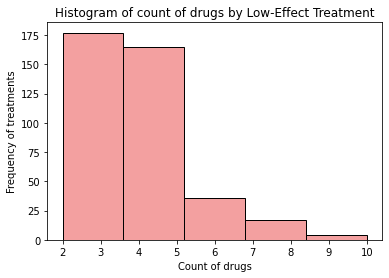

In [8]:
ax = sns.histplot(data=low_effect, x='count_drug', bins=5, legend=False, color=col[1])
ax.set_xlabel('Count of drugs')
ax.set_ylabel('Frequency of treatments')
plt.title('Histogram of count of drugs by Low-Effect Treatment')
plt.savefig('Embeddings/Plots/histogram_low_effect_treatment.pdf', format='pdf', bbox_inches='tight')

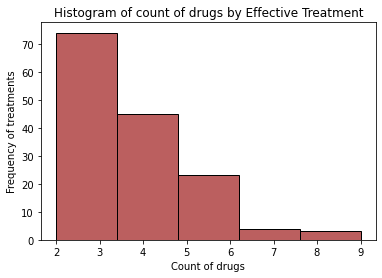

In [9]:
ax = sns.histplot(data=effective, x='count_drug', bins=5, legend=False, color=col[0])
ax.set_xlabel('Count of drugs')
ax.set_ylabel('Frequency of treatments')
plt.title('Histogram of count of drugs by Effective Treatment')
plt.savefig('Embeddings/Plots/histogram_effective_treatment.pdf', format='pdf', bbox_inches='tight')

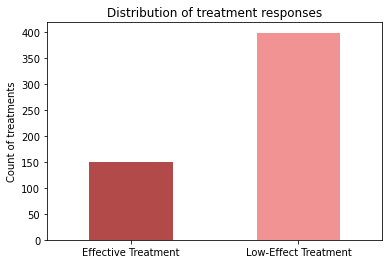

In [10]:
df = pd.DataFrame(data=[effective.shape[0], low_effect.shape[0]], columns=['treatment'],
                  index=['Effective Treatment', 'Low-Effect Treatment'])
ax = df['treatment'].plot(kind="bar", color=col, alpha=0.85,)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel('Count of treatments')
plt.title('Distribution of treatment responses')
plt.savefig('Embeddings/Plots/distribution_treatment.pdf', format='pdf', bbox_inches='tight')